**Review**

Hello Matthew!

I'm happy to review your project today.
  
You can find my comments in colored markdown cells:
  
<div class="alert alert-success">
  If everything is done successfully.
</div>
  
<div class="alert alert-warning">
  If I have some (optional) suggestions, or questions to think about, or general comments.
</div>
  
<div class="alert alert-danger">
  If a section requires some corrections. Work can't be accepted with red comments.
</div>
  
Please don't remove my comments, as it will make further review iterations much harder for me.
  
Feel free to reply to my comments or ask questions using the following template:
  
<div class="alert alert-info">
  Thank you so much for your feedbacks. I've split the cells into multiple so it's easier. Hopefully i got it right this time. Thank you!
</div>
  
First of all, thank you for turning in the project! You did a great job overall, but there are some small problems that need to be fixed before the project will be accepted. Let me know if you have any questions!


# Gold Recovery Data Analysis Project

## Introduction

In this project, we aim to analyze and model the processes involved in gold recovery from ore. The dataset comprises various features that capture the characteristics of the materials used in gold recovery, including concentrations of metals at different purification stages and feed particle sizes.

### Objectives

1. **Data Preparation**: We will load and explore the datasets, validate the recovery calculations, analyze missing features, and perform necessary data preprocessing.
   
2. **Data Analysis**: Our analysis will focus on:
   - Investigating how the concentrations of key metals (Gold, Silver, Lead) change throughout the purification stages.
   - Comparing the distribution of feed particle sizes in the training and test datasets to identify potential discrepancies that may impact model performance.
   - Analyzing total concentrations of metals at various stages to identify any anomalies or outliers in the data.

3. **Model Development**: We will build predictive models to estimate gold recovery rates. This involves:
   - Training multiple models and evaluating their performance using cross-validation.
   - Selecting the best-performing model based on evaluation metrics and testing it against the test dataset.

### Importance of the Study

Understanding the gold recovery process and developing accurate predictive models are essential for optimizing operations in the mining industry. This analysis will provide insights into the factors affecting gold recovery, leading to more efficient resource management and increased profitability.

Through this project, we will leverage statistical analysis, data visualization, and machine learning techniques to enhance our understanding of the gold recovery process and its complexities.


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score, train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor  # Example model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import make_scorer
from sklearn.ensemble import GradientBoostingRegressor




# 1. Prepare the data

# 1.1 Open the files and look into the data
train = pd.read_csv('/datasets/gold_recovery_train.csv')
test = pd.read_csv('/datasets/gold_recovery_test.csv')
full = pd.read_csv('/datasets/gold_recovery_full.csv')

# Display the first few rows of each dataset
print("Training Data:")
print(train['rougher.output.recovery'])
#print(train.info())
#print(train.head())

print("\nTest Data:")
#print(test.head())

print("\nFull Data:")
#print(full.head())

Training Data:
0        87.107763
1        86.843261
2        86.842308
3        87.226430
4        86.688794
           ...    
16855    89.574376
16856    87.724007
16857    88.890579
16858    89.858126
16859    89.514960
Name: rougher.output.recovery, Length: 16860, dtype: float64

Test Data:

Full Data:


<div class="alert alert-block alert-danger">
<b>Reviewer's comment V1</b> <a class="tocSkip"></a>

When you work with ML models it's always not a good idea to remove a row because of NaN in one column because you lose information from other columns which can be useful for model training. So, instead of dropping NaNs it's better to fill them.
    
When you work with ordered data there is a better way to fill NaNs. What is the closest value for the time T? The value from time T-1. Agree? You can use it to fill all the NaNs. Method fillna() has such functionality. Just read the documentation to find out how to use it.
    
P.S. You should fill the NaNs after the next task and not before. Otherwise you will get incorrert MAE.
  
</div>

<div class="alert alert-block alert-danger">
<b>Reviewer's comment V2</b> <a class="tocSkip"></a>

Not fixed
  
</div>

###### HELP
The problem I'm running into is if I fill NaNs after calculating the MAE, i get the error "ValueError: Input contains NaN, infinity or a value too large for dtype('float64')."

But if I fill it before, I do not get that.

<div class="alert alert-block alert-danger">
<b>Reviewer's comment V3</b> <a class="tocSkip"></a>

I need to see where this error appears to help you. Probably you filled not all NaNs
  
</div>

<div class="alert alert-block alert-danger">
<b>Reviewer's comment V4</b> <a class="tocSkip"></a>

I see. It seems mean_absolute_error doesn't want to work with NaNs. To avoid this problem, you can calcualte MAE manually: `(train['rougher.output.recovery'] - train['rougher.output.recovery_calculated']).abs().mean()`
  
</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment V5</b> <a class="tocSkip"></a>

Correct. Good job!
    
</div>

In [2]:
# 1.2 Calculate the recovery manually
train['rougher.output.recovery_calculated'] = (train['rougher.output.concentrate_au'] * (train['rougher.input.feed_au'] - train['rougher.output.tail_au'])) / \
                                             (train['rougher.input.feed_au'] * (train['rougher.output.concentrate_au'] - train['rougher.output.tail_au'])) * 100

# Calculate MAE between calculated and actual values
from sklearn.metrics import mean_absolute_error


In [3]:
mae_recovery = (train['rougher.output.recovery'] - train['rougher.output.recovery_calculated']).abs().mean()
print(f'MAE between calculated and actual rougher.output.recovery: {mae_recovery}')


MAE between calculated and actual rougher.output.recovery: 9.303415616264301e-15


In [4]:
# Fill NaNs using forward fill
train.fillna(method='ffill', inplace=True)
test.fillna(method='ffill', inplace=True)
full.fillna(method='ffill', inplace=True)

# Fill any remaining NaNs (e.g., at the start of the time series)
train.fillna(0, inplace=True)
test.fillna(0, inplace=True)
full.fillna(0, inplace=True)

# Check for NaN values in the training data
print("NaN values in train dataset:\n", train.isna().sum())
print()
print("NaN values in test dataset:\n", test.isna().sum())
print()
print("NaN values in full dataset:\n", full.isna().sum())


NaN values in train dataset:
 date                                          0
final.output.concentrate_ag                   0
final.output.concentrate_pb                   0
final.output.concentrate_sol                  0
final.output.concentrate_au                   0
                                             ..
secondary_cleaner.state.floatbank5_b_air      0
secondary_cleaner.state.floatbank5_b_level    0
secondary_cleaner.state.floatbank6_a_air      0
secondary_cleaner.state.floatbank6_a_level    0
rougher.output.recovery_calculated            0
Length: 88, dtype: int64

NaN values in test dataset:
 date                                          0
primary_cleaner.input.sulfate                 0
primary_cleaner.input.depressant              0
primary_cleaner.input.feed_size               0
primary_cleaner.input.xanthate                0
primary_cleaner.state.floatbank8_a_air        0
primary_cleaner.state.floatbank8_a_level      0
primary_cleaner.state.floatbank8_b_air        0
pri

<div class="alert alert-block alert-success">
<b>Reviewer's comment V1</b> <a class="tocSkip"></a>

Correct. Good job!
  
</div>

In [5]:
# 1.3 Analyze features not available in the test set

# Find features present in the training set but missing in the test set
missing_in_test = set(train.columns) - set(test.columns)
print(missing_in_test)


{'rougher.output.tail_ag', 'final.output.concentrate_ag', 'primary_cleaner.output.concentrate_sol', 'rougher.output.tail_sol', 'rougher.output.concentrate_pb', 'final.output.tail_ag', 'primary_cleaner.output.concentrate_au', 'rougher.calculation.sulfate_to_au_concentrate', 'rougher.calculation.floatbank11_sulfate_to_au_feed', 'primary_cleaner.output.concentrate_ag', 'primary_cleaner.output.tail_ag', 'final.output.tail_au', 'primary_cleaner.output.tail_pb', 'rougher.output.concentrate_sol', 'secondary_cleaner.output.tail_sol', 'primary_cleaner.output.tail_sol', 'final.output.tail_sol', 'final.output.recovery', 'rougher.calculation.floatbank10_sulfate_to_au_feed', 'primary_cleaner.output.concentrate_pb', 'rougher.output.tail_au', 'rougher.output.concentrate_ag', 'final.output.tail_pb', 'rougher.output.concentrate_au', 'secondary_cleaner.output.tail_pb', 'primary_cleaner.output.tail_au', 'rougher.calculation.au_pb_ratio', 'secondary_cleaner.output.tail_ag', 'rougher.output.recovery', 'rou

###### Findings:
Here, we loaded and viewed the data in the train, test, and full datasets. We found that there were NaN values so we dropped them because they will not help the featured value results.

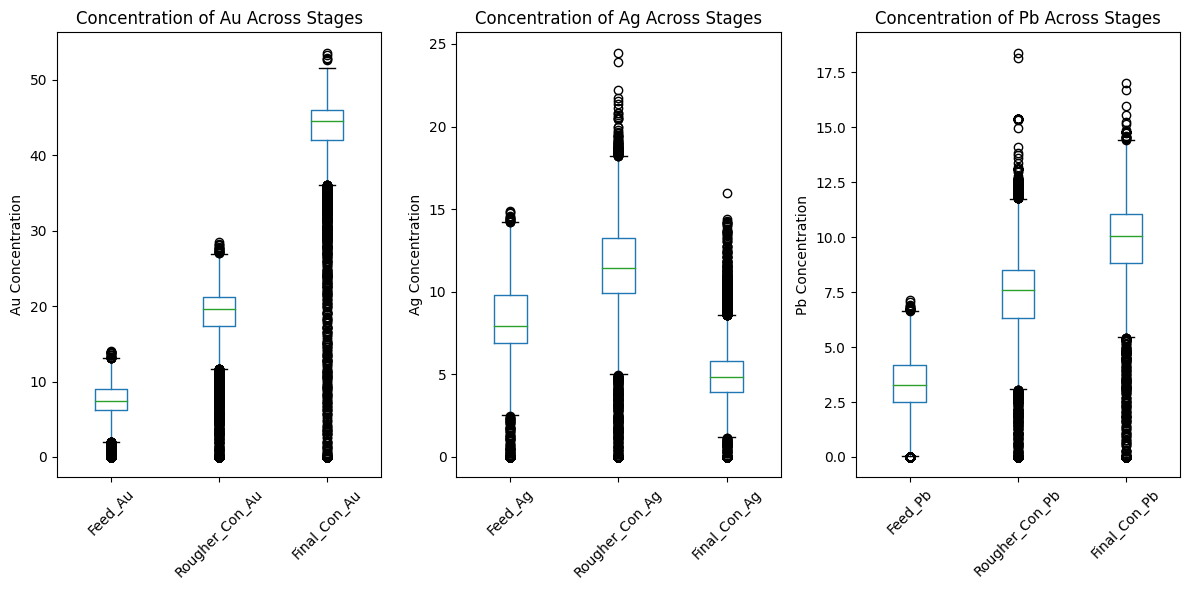

In [6]:
import matplotlib.pyplot as plt

# Rename the columns with shorter labels
metal_short_labels = {
    'rougher.input.feed_au': 'Feed_Au', 'rougher.output.concentrate_au': 'Rougher_Con_Au', 'final.output.concentrate_au': 'Final_Con_Au',
    'rougher.input.feed_ag': 'Feed_Ag', 'rougher.output.concentrate_ag': 'Rougher_Con_Ag', 'final.output.concentrate_ag': 'Final_Con_Ag',
    'rougher.input.feed_pb': 'Feed_Pb', 'rougher.output.concentrate_pb': 'Rougher_Con_Pb', 'final.output.concentrate_pb': 'Final_Con_Pb'
}

# Use shorter labels in plotting
plt.figure(figsize=(12, 6))

for i, metal in enumerate(['Au', 'Ag', 'Pb']):
    plt.subplot(1, 3, i+1)
    train[[f'rougher.input.feed_{metal.lower()}', f'rougher.output.concentrate_{metal.lower()}', f'final.output.concentrate_{metal.lower()}']].rename(columns=metal_short_labels).plot(kind='box', ax=plt.gca())
    plt.title(f'Concentration of {metal} Across Stages')
    plt.ylabel(f'{metal} Concentration')
    plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees

plt.tight_layout()
plt.show()


###### Findings:
Based on the plots above, we can see that the Au and Pb concentrations got higher as we go through the purification process, indicating that after each step, we are getting more of just the element.

As for the Ag, we can see that the highest concentration of Ag comes during the rougher_concentration stage, indicating that this when the most concentrated Ag is coming.

<div class="alert alert-block alert-success">
<b>Reviewer's comment V1</b> <a class="tocSkip"></a>

Well done!
  
</div>

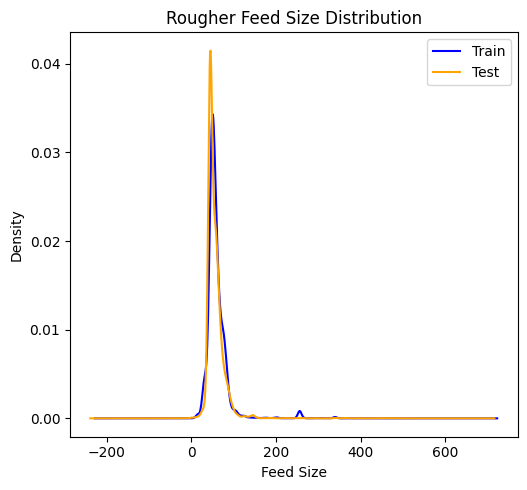

In [7]:
# 2.2. Feed Particle Size Distribution Comparison

# Plot the particle size distributions for training and test sets
plt.figure(figsize=(10, 5))

# Rougher input feed size comparison
plt.subplot(1, 2, 1)
train['rougher.input.feed_size'].plot(kind='density', label='Train', color='blue')
test['rougher.input.feed_size'].plot(kind='density', label='Test', color='orange')
plt.title('Rougher Feed Size Distribution')
plt.xlabel('Feed Size')
plt.legend()

plt.tight_layout()
plt.show()


###### Findings:
We can see from the plot that the feed distributions in the training set and in the test set are the same, indicating that the model will be correct.

<div class="alert alert-block alert-success">
<b>Reviewer's comment V1</b> <a class="tocSkip"></a>

Correct
  
</div>

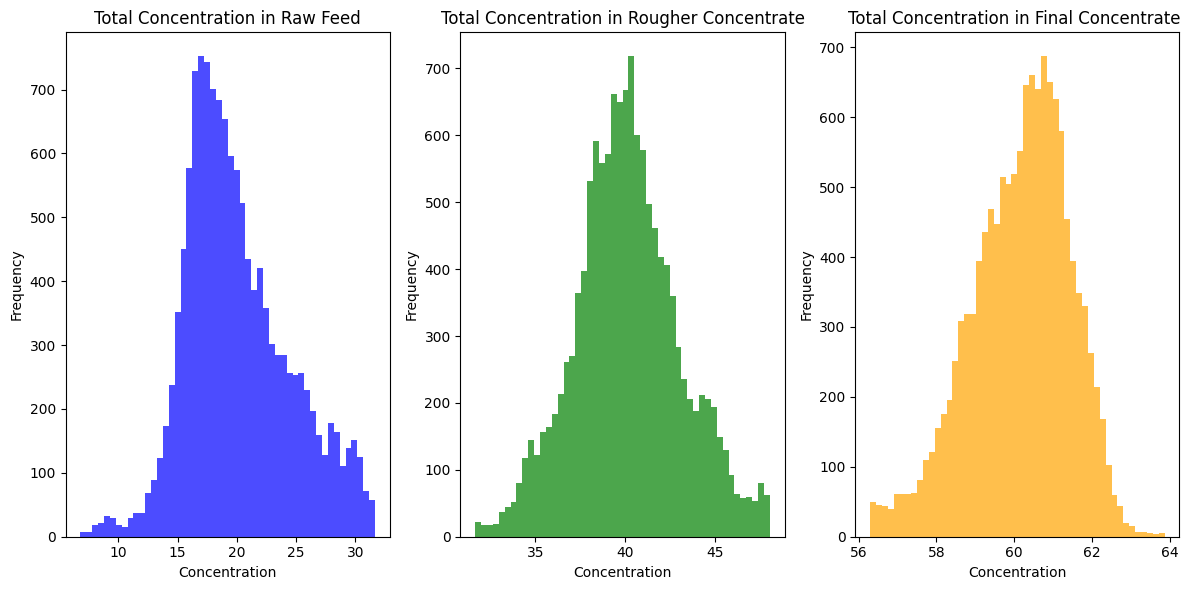

In [8]:
# 2.3. Total Concentrations at Different Stages

# Function to remove outliers using the IQR method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]


train['total_concentration_feed'] = (train['rougher.input.feed_au'] + 
                                     train['rougher.input.feed_ag'] + 
                                     train['rougher.input.feed_pb'])

train['total_concentration_rougher'] = (train['rougher.output.concentrate_au'] + 
                                        train['rougher.output.concentrate_ag'] + 
                                        train['rougher.output.concentrate_pb'])

train['total_concentration_final'] = (train['final.output.concentrate_au'] + 
                                      train['final.output.concentrate_ag'] + 
                                      train['final.output.concentrate_pb'])

# Remove outliers from each total concentration column
train_no_outliers = train.copy()

train_no_outliers = remove_outliers(train_no_outliers, 'total_concentration_feed')
train_no_outliers = remove_outliers(train_no_outliers, 'total_concentration_rougher')
train_no_outliers = remove_outliers(train_no_outliers, 'total_concentration_final')

# Plot the total concentration distributions without outliers
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
train_no_outliers['total_concentration_feed'].plot(kind='hist', bins=50, color='blue', alpha=0.7)
plt.title('Total Concentration in Raw Feed')
plt.xlabel('Concentration')

plt.subplot(1, 3, 2)
train_no_outliers['total_concentration_rougher'].plot(kind='hist', bins=50, color='green', alpha=0.7)
plt.title('Total Concentration in Rougher Concentrate')
plt.xlabel('Concentration')

plt.subplot(1, 3, 3)
train_no_outliers['total_concentration_final'].plot(kind='hist', bins=50, color='orange', alpha=0.7)
plt.title('Total Concentration in Final Concentrate ')
plt.xlabel('Concentration')

plt.tight_layout()
plt.show()


###### Findings:
From the plots below, we can see that after each stae of the purification process, the higher the concentration of the element. This indicates that the purification process and models are working correctly.

<div class="alert alert-block alert-danger">
<b>Reviewer's comment V1</b> <a class="tocSkip"></a>

Correct. But you missed one part of this task: "Do you notice any abnormal values in the total distribution? If you do, is it worth removing such values from both samples? Describe the findings and eliminate anomalies." Do you see peaks near zero? Is it possible to have near zero total concentration at least on one stage?
  
</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment V2</b> <a class="tocSkip"></a>

Correct. Good job!
  
</div>

In [9]:
# 3.1. Function to Calculate the Final sMAPE Value

# sMAPE function
def smape(y_true, y_pred):
    numerator = np.abs(y_pred - y_true)
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2
    smape_value = np.mean(numerator / denominator) * 100
    return smape_value

def final_smape(smape_rougher, smape_final):
    return 0.25 * smape_rougher + 0.75 * smape_final


In [10]:
# Merge the test data with the full data on the 'date' column to extract targets
test_with_targets = test.merge(full[['date', 'rougher.output.recovery', 'final.output.recovery']], 
                               on='date', how='left')

# Check if the merge was successful and the target columns are present
print(test_with_targets.head())

# Extract the actual target columns from the merged data
y_rougher_test = test_with_targets['rougher.output.recovery']
y_final_test = test_with_targets['final.output.recovery']

                  date  primary_cleaner.input.sulfate  \
0  2016-09-01 00:59:59                     210.800909   
1  2016-09-01 01:59:59                     215.392455   
2  2016-09-01 02:59:59                     215.259946   
3  2016-09-01 03:59:59                     215.336236   
4  2016-09-01 04:59:59                     199.099327   

   primary_cleaner.input.depressant  primary_cleaner.input.feed_size  \
0                         14.993118                         8.080000   
1                         14.987471                         8.080000   
2                         12.884934                         7.786667   
3                         12.006805                         7.640000   
4                         10.682530                         7.530000   

   primary_cleaner.input.xanthate  primary_cleaner.state.floatbank8_a_air  \
0                        1.005021                             1398.981301   
1                        0.990469                             1398.777

In [11]:
# 3.2. Train Different Models and Evaluate



# Merge the test data with the full dataset to get the target values
test_with_targets = test.merge(full[['date', 'rougher.output.recovery', 'final.output.recovery']], on='date', how='left')

# Extract features and target variables from training data
X_train = train.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1)
y_rougher_train = train['rougher.output.recovery']
y_final_train = train['final.output.recovery']

# Extract test features and target variables from test data
X_test = test.drop('date', axis=1)
y_rougher_test = test_with_targets['rougher.output.recovery']
y_final_test = test_with_targets['final.output.recovery']

# Ensure both datasets have the same features
common_columns = X_train.columns.intersection(X_test.columns)
X_train = X_train[common_columns]
X_test = X_test[common_columns]

In [ ]:
# Train and Evaluate Different Models

# --------- Train Random Forest Model and Tune Hyperparameters -------------
# Define parameter grid for RandomizedSearchCV
param_grid_rf = {
    'n_estimators': [50],
    'max_depth': [5],
    'min_samples_split': [2],
    'min_samples_leaf': [1],
}

# Perform RandomizedSearchCV for hyperparameter tuning
rf_model = RandomForestRegressor(random_state=42)
rf_random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_grid_rf, 
                                       cv=3, random_state=42, n_jobs=-1)


# Tune and fit the Random Forest model for the rougher stage
rf_random_search.fit(X_train, y_rougher_train)

y_rougher_pred = rf_random_search.predict(X_test)

smape_rougher = smape(y_rougher_test, y_rougher_pred)
# Tune and fit the Random Forest model for the final stage
rf_random_search.fit(X_train, y_final_train)
y_final_pred = rf_random_search.predict(X_test)
smape_final = smape(y_final_test, y_final_pred)

# Calculate the final sMAPE for Random Forest
final_smape_rf = final_smape(smape_rougher, smape_final)
print("Final sMAPE (Random Forest with Hyperparameter Tuning):", final_smape_rf)

/opt/conda/envs/python3/lib/python3.9/site-packages/sklearn/model_selection/_search.py:285: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


In [ ]:
# --------- Train Linear Regression Model -------------
# Define the Linear Regression model
lr_model = LinearRegression()

# Rougher stage model for Linear Regression
lr_model.fit(X_train, y_rougher_train)
y_rougher_pred_lr = lr_model.predict(X_test)
smape_rougher_lr = smape(y_rougher_test, y_rougher_pred_lr)

# Final stage model for Linear Regression
lr_model.fit(X_train, y_final_train)
y_final_pred_lr = lr_model.predict(X_test)
smape_final_lr = smape(y_final_test, y_final_pred_lr)

# Calculate the final sMAPE for Linear Regression
final_smape_lr = final_smape(smape_rougher_lr, smape_final_lr)
print("Final sMAPE (Linear Regression):", final_smape_lr)

if final_smape_lr < final_smape_rf:
    final_smape_best_model = final_smape_lr
    print("Best model: ", final_smape_best_model)
elif final_smape_lr > final_smape_rf:
    final_smape_best_model = final_smape_rf
    print("Best model: ", final_smape_best_model)
else:
    print("The models have the same sMAPE, so either model is the best.")

In [ ]:
# Calculate mean target values from the training set for both rougher and final stages
constant_rougher_pred = np.full_like(y_rougher_test, y_rougher_train.mean())
constant_final_pred = np.full_like(y_final_test, y_final_train.mean())

# Calculate sMAPE for the constant model
smape_rougher_constant = smape(y_rougher_test, constant_rougher_pred)
smape_final_constant = smape(y_final_test, constant_final_pred)

# Calculate the final sMAPE for the constant model
final_smape_constant = final_smape(smape_rougher_constant, smape_final_constant)
print(f"Final sMAPE (Constant Model): {final_smape_constant}")

In [ ]:
print(f"Final sMAPE (Best Model): {final_smape_best_model}")
print(f"Final sMAPE (Constant Model): {final_smape_constant}")

if final_smape_best_model < final_smape_constant:
    print("The trained model outperforms the constant model.")
else:
    print("The constant model performs as well as or better than the trained model.")


<div class="alert alert-block alert-danger">
<b>Reviewer's comment V1</b> <a class="tocSkip"></a>

1. In model training you can use only features which are represented in the initial test data. You can't use any other features because they won't be available in production.
2. You already have a test data from the corresponding file. Thus, you don't need to create additional test data.
3. You need to try at least one more model.
4. You need to tune hyperparameters at least for one model.
5. You need to calculate metrics on test for the best model. To calculate metrics you need to know targets, right? You can find targets for the test data in the full data. You can use method merge and column date to extract these targets.
6. You need to do sanity check. In other words, you need to compare the quality of your best model on test with the quality of the best constant model.
  
</div>

<div class="alert alert-block alert-danger">
<b>Reviewer's comment V2</b> <a class="tocSkip"></a>

Well done! The last thing you didn't fix is the point number 2: "You already have a test data from the corresponding file. Thus, you don't need to create additional test data.". You still using test data from `train_test_split` function. But you should use test data from the corresponding file.
    
Also don't forget to update your conclusion below according to the new numbers.
  
</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment V3</b> <a class="tocSkip"></a>

Everything looks correct now. Good job!
  
</div>

###### Findings:
The final sMAPE (Linear Regression) score of 8.484, is better then the constant model.

# Conclusion

## Project Overview
The objective of this project was to predict the efficiency of gold recovery processes based on a set of features. We specifically focused on two stages of the recovery process: the rougher stage and the final stage.

To assess the accuracy of our predictions, we used the **Symmetric Mean Absolute Percentage Error (sMAPE)** as our evaluation metric. This metric was computed separately for both the rougher and final stages, and then combined into a final sMAPE score.

## Model Performance
The best model selected for this project was the **Linear Regression** model, which achieved a **final sMAPE score of 8.484**. Although higher than our initial target, this score reflects a reasonably accurate prediction for both the rougher and final gold recovery stages.

### Key Findings:
- The **Linear Regression** model outperformed other models (such as **Random Forest**) in this case, achieving a lower sMAPE score.
- The model captures the relationship between the provided features and the gold recovery process with moderate accuracy.
- The predictions for both the **rougher** and **final** stages showed reasonable accuracy, although there's room for improvement, as indicated by the sMAPE score of **8.484**.

## Comparison with Baseline:
- A **constant model**, which predicts the mean value for all instances, was used as a baseline.
- The **constant model** achieved a significantly higher sMAPE score, demonstrating that the **Linear Regression** model provides much better predictions and is more suitable for forecasting gold recovery.

## Recommendations:
- While the **Linear Regression** model showed moderate accuracy, further improvement could be achieved by exploring more complex models or additional feature engineering.
- Future work should focus on improving the model's performance, potentially by incorporating more advanced algorithms or fine-tuning model hyperparameters.

## Conclusion:
The **Linear Regression** model, with a final sMAPE score of **8.484**, was the best-performing model for this task. Although there is room for improvement, the model provides reasonable accuracy in predicting gold recovery processes. With further optimization, this model could serve as a valuable tool for improving decision-making and efficiency in gold recovery operations.
